# Contents
- [1 Error Estimate Formulas](#1-error-estimate-formulas)
- [2 Symbolical Commutator Evaluators](#2-symbolical-commutator-evaluators)
  - [2.1 Heisenberg Hamiltonian Terms](#21-heisenberg-hamiltonian-terms)
    - [2.1.1 The `gen_Heisenberg_terms` function](#211-the-gen_heisenberg_terms-function)
  - [2.2 Rules for Commutators of Pauli Strings](#22-rules-for-commutators-of-pauli-strings)
  - [2.3 Evaluation of Commutators: the `comm_pstr` function](#23-evaluation-of-commutators-the-comm_pstr-function)
  - [2.4 $N=3$ tests](#24-n3-tests)
- [3 First Order Single-Step Error](#3-first-order-single-step-error)
  - [3.1 Compute Error Terms Numerically](#31-compute-error-terms-numerically)
  - [3.2 $N=3$ tests](#32-n3-tests)
  - [3.3 $e_1$ decomposition](#33-e_1-decomposition)
  - [3.4 Numerical Analysis of Error Scalings](#34-numerical-analysis-of-error-scalings)
    - [3.4.1 $dt$ scaling](#341-dt-scaling)
    - [3.4.2 $dt$ scaling: power law fit](#342-dt-scaling-power-law-fit)
    - [3.4.3 $N$ scaling: there are caveats](#343-n-scaling-there-are-caveats)
  - [3.5 Peaked Neutrino Beam](#35-peaked-neutrino-beam)
    - [3.5.1 Visualization of neutrino beam](#351-visualization-of-neutrino-beam)
    - [3.5.2 $dt$ scaling](#352-dt-scaling)
    - [3.5.3 $N$ scaling: first approach (log-log)](#353-n-scaling-first-approach-log-log)
    - [3.5.4 $N$ scaling: second approach (alt)](#354-n-scaling-second-approach-alt)
    - [3.5.5 $N$ scaling: third approach (count-terms-to-estimate-γ-todo)](#355-n-scaling-third-approach-count-terms-to-estimate-γ-todo)
    - [3.5.6 Compare $N$ scalings results](#356-compare-n-scalings-results)
  - [3.6 Yet Another Attempt](#36-yet-another-attempt)
  - [3.7 Sanity check](#37-sanity-check)
  - [3.8 Results](#38-results)
  
[## 5 Second Order Single-Step Error### 5.1 Compute Error Terms Numerically### 5.2 $e_2$ decomposition### 5.3 Numerical analysis of error scalings#### 5.3.1 $dt$ scaling### 5.4 Peaked neutrino beam#### 5.4.1 $dt$ scaling#### 5.4.2 $N$ scaling: first approach (log-log)#### 5.4.3 $N$ scaling: second approach (alt)#### 5.4.4 $N$ scaling: third approach (count terms to estimate $\gamma'$) (TODO)#### 5.4.5 Compare $N$ scalings results]: #


Recap of code and estimates for the first order single-step Trotter error scaling as a function of the parameters of the system.

I provide estimates for the scaling laws of each contribution to the error. For the single-step error, I assume the followig scaling of the form:
$$
\epsilon_{T1}(dt)\leq e_\alpha(N, dt, \{g_{ij}, i,j=1,\dots,N, i<j\}) = \mathcal{O}\left(\mathcal{G}^{S_1^{T1}}N^{S_2^{T1}}dt^{S_3^{T1}}\right)\tag{1}
$$

There are many possible functions $e_\alpha$ that are acceptable bounds for the first order Trotter error. I aim to provide an expression for $e_\alpha$ that is as strict of a bound as possible.  

## 1 Error Estimate Formulas
A way to provide quantitative bounds for the first order Trotter error is introduced in Proposition 9 and 10 in https://journals.aps.org/prx/pdf/10.1103/PhysRevX.11.011020 (Theory of Trotter Error with Commutator Scaling):
* first order: $\varepsilon_1(t)\coloneqq\left\| \mathscr{S}_1(t) - e^{-i t H} \right\| \leq \frac{t^2}{2} \sum_{\gamma_1=1}^{\Gamma}  \left\| \left[ \sum_{\gamma_2 = \gamma_1 + 1}^{\Gamma}H_{\gamma_2}, H_{\gamma_1} \right] \right\|$ 
* second order: $\varepsilon_2(t)\coloneqq\left\| \mathscr{S}_2(t) - e^{-i t H} \right\| \leq \; \frac{t^3}{12} \sum_{\gamma_1=1}^{\Gamma}  \left\| \left[ \sum_{\gamma_3 = \gamma_1 + 1}^{\Gamma}H_{\gamma_3}, \sum_{\gamma_2 = \gamma_1 + 1}^{\Gamma} \left[ H_{\gamma_2}, H_{\gamma_1} \right] \right] \right\| + \frac{t^3}{24} \sum_{\gamma_1=1}^{\Gamma} \left\| \left[ H_{\gamma_1}, \left[ H_{\gamma_1}, \sum_{\gamma_2 = \gamma_1 + 1}^{\Gamma} H_{\gamma_2} \right] \right] \right\|$

The target Hamiltonian of my simulation is the $N$ qubit Heisenberg Hamiltonian, given below together with its decomposition in terms of "analog Hamiltonians":
$$
H_\text{Heisenberg}^N = \sum_{\substack{p,q=1\\p<q}}g_{pq}\left(X_pX_q+Y_pY_q+Z_pZ_q\right) \equiv H_{XY}^N+H_{XZ}^N+H_{YZ}^N \tag{3}
$$
where $H_{AB}^N \equiv \sum_{\substack{p,q=1\\p<q}}\frac{g_{pq}}{2}\left(A_pA_q+B_pB_q\right)$.

The structure of the simulation algorithm I specialize these formulas to the $\Gamma=3$ case (see section 4.3 in latex notes):
* first order: $$\varepsilon_1(t)\leq\frac{t^2}{2}\left\{\|[H_{XY}^N,H_{XZ}^N]\|+\|[H_{XY}^N,H_{YZ}^N]\|+\|[H_{XZ}^N,H_{YZ}^N]\|\right\} \tag{4}$$
* second order: 
$$
\begin{split}
&\varepsilon_2(t)\leq\frac{t^3}{12}\Bigl\{\|[H_{XZ}^N,[H_{XZ}^N,H_{XY}^N]]\|+\|[H_{XZ}^N,[H_{YZ}^N,H_{XY}^N]]\|+\|[H_{YZ}^N,[H_{XZ}^N,H_{XY}^N]]\|+\|[H_{YZ}^N,[H_{YZ}^N,H_{XY}^N]]\|+\|[H_{YZ}^N,[H_{XY}^N,H_{XZ}^N]]\|\Bigr\}+\\
&\qquad\qquad+\frac{t^3}{24}\Bigl\{\|[H_{XY}^N,[H_{XY}^N,H_{XZ}^N]]\|+\|[H_{XY}^N,[H_{XY}^N,H_{YZ}^N]]\|+\|[H_{XZ}^N,[H_{XZ}^N,H_{YZ}^N]]\|\Bigr\}
\end{split} \tag{5}
$$

In the following sections, I use these formulas as the building block to provide upper bounds for the scaling of the Trotter error.

## 2 Symbolical Commutator Evaluators
I have been developing a series of tools to compute the commutators involved in $(4)$ and $(5)$ both symbolically and numerically.

In this section, I discuss the symbolical computation of such commutators.


### 2.1 Heisenberg Hamiltonian Terms
The building block of the simulation is the target Hamiltonian and its decomposition. I need to provide means to represent and compute the terms that appear in each contribution in $(3)$. 

I represent $H_{XY}^N, H_{XZ}^N, H_{YZ}^N$ as lists of tuples, where each tuple represents a single term as 
```(scalar coefficient (float), coupling coefficient (string), Pauli string (string))```
I use tuples instead of lists to emphasize that the terms appearing in the Hamiltonian are fixed. 

#### 2.1.1 The `gen_Heisenberg_terms` function
The `gen_Heisenberg_terms.py` function generates $H_{XY}^N, H_{XZ}^N, H_{YZ}^N$ according to the above definitions. 

In [2]:
def gen_Heisenberg_terms(N):
        XY = [] 
        XZ = []   
        YZ = [] 

        for i in range(N):
            for j in range(i+1, N):
                gate_id = f"g{i+1}{j+1}" 

                xx_term = ["X" if k == i or k == j else "I" for k in range(N)]
                yy_term = ["Y" if k == i or k == j else "I" for k in range(N)]
                zz_term = ["Z" if k == i or k == j else "I" for k in range(N)]

                XY.append((0.5, gate_id, "".join(xx_term)))
                XY.append((0.5, gate_id, "".join(yy_term)))

                XZ.append((0.5, gate_id, "".join(xx_term)))
                XZ.append((0.5, gate_id, "".join(zz_term)))

                YZ.append((0.5, gate_id, "".join(yy_term)))
                YZ.append((0.5, gate_id, "".join(zz_term)))

        return XY, XZ, YZ

### 2.2 Rules for Commutators of Pauli Strings
The building blocks of the commutators are now available. Now I want to implement functions that compute the commutators of generic sequences combinations of Pauli strings. I choose not to approach this tasks by computing the commutators via matrix multiplication because I couldn't see a way to include symbolic couplings in the scheme keeping the code relatively simple.

Because of this limitation, I choose to implement the calculation of Pauli strings commutators by hard coding the rules that govern the commutators between individual Pauli strings.

A simple observation leads to a powerful insight. Consider two Pauli N-strings :
$$
M_1 = P_1\otimes \dots \otimes P_N, \quad M_2 = Q_1\otimes \dots \otimes Q_N
$$
where $P_k,Q_k\in\{\mathbb{I}_k,X_k,Y_k,Z_k\}$. Their commutator reads:
$$
\begin{split}
    & [M_1,M_2] = M_1M_2-M_2M_1 \\
    & \qquad = (P_1Q_1)\otimes \dots \otimes (P_NQ_N)-(Q_1P_1)\otimes \dots \otimes (Q_NP_N) \tag{A}
\end{split}
$$
Here, recall the key multiplication rule for Pauli operators: two Pauli matrices (including the identity) $A,B$ are always such that
$$
AB=\pm BA
$$ 
with $+$ when they are equal or one of them is the identity, and $-$ otherwise. 
This means that when a pair in $(A)$ commutes it can be swapped for free. Instead, when the pair anticommutes, swapping it costs a minus sign. It follows that:
$$
M_1M_2 = (-1)^{N_\text{anticommuting}}M_2M_1 \tag{6}
$$
$N_\text{anticommuting}$ is the number of anticommuting pairs in $M_1M_2$.

Expression $(6)$ is key because it defines a criterion to detect null commutators just by tracking the number of anticommuting pairs. 

### 2.3 Evaluation of Commutators: the `comm_pstr` function
In this Section the main function of Section 2 is introduced. The `comm_pstr` function computes the commutator of two generic Pauli N-strings. The arguments of the function are Pauli strings `pstr1`, `pstr2` given in the format set in the conventions. 

**Description of the function**:

First, I create variables `ps1`, `ps2` for the individual Pauli strings. Then I create additional variables to keep track of the various bits involved in the commutator:
* `coeff`: numerical coefficient of the resulting Pauli string. Its initial value is given by the product of the numerical coefficients of the input arguments.
* `psfinal`: the Pauli string that results from the commutator.
* `acomm_cnt`: number of anticommuting sites, determined as described in the previous Section.

I then loop over the characters of the Pauli strings to determine how each pair contributes to the coefficient and whether the pair anticommutes. The result of anticommuting check can only happen after looping over the full strings at least once, hence the main loop also keeps track of the Pauli operator that results from the individual pair. This operation is performed using the `pauli_mult_table` dictionary. Note that `acomm_cnt` corresponds exactly to $N_\text{anticommuting}$ of equation $(6)$. 


In [3]:
pauli_mult_table = {
    ('I', 'I'): (1, 'I'),
    ('I', 'X'): (1, 'X'),
    ('I', 'Y'): (1, 'Y'),
    ('I', 'Z'): (1, 'Z'),
    ('X', 'I'): (1, 'X'),
    ('Y', 'I'): (1, 'Y'),
    ('Z', 'I'): (1, 'Z'),
    ('X', 'X'): (1, 'I'),
    ('Y', 'Y'): (1, 'I'),
    ('Z', 'Z'): (1, 'I'),
    ('Y', 'Z'): (+1j, 'X'),
    ('X', 'Y'): (+1j, 'Z'),
    ('Z', 'X'): (+1j, 'Y'),
    ('Y', 'X'): (-1j, 'Z'),
    ('Z', 'Y'): (-1j, 'X'),
    ('X', 'Z'): (-1j, 'Y'),
    ('0', 'I'): (0, '0'),
    ('0', 'X'): (0, '0'),
    ('0', 'Y'): (0, '0'),
    ('X', '0'): (0, '0'),
    ('I', '0'): (0, '0'),
    ('X', '0'): (0, '0'),
    ('Y', '0'): (0, '0'),
    ('Z', '0'): (0, '0')
}

**Example 1**: $N=3$, $P_1 = X_1X_2 = X\otimes X\otimes I$, $P_2 = Y_2Y_3 = I\otimes Y\otimes Y$. Their commutator is easily found:
$$
\left[P_1,P_2\right] = (XI)\otimes(XY)\otimes(IY)-(IX)\otimes(YX)\otimes(YI) = X\otimes(XY-YX)\otimes Y = X\otimes[X,Y]\otimes Y = 2iX_1Z_2Y_3
$$
&emsp;&emsp;&emsp;&emsp;&emsp;This is the "standard" way to compute this commutator. A slightly different way of getting this result gives a great insight in my way of implementing the commutation rules: using the `pauli_mult_table` rules
$$
\left[P_1,P_2\right] = X\otimes(XY-YX)\otimes Y = X\otimes(iZ - (-iZ))\otimes Y = 2\cdot\left(X\otimes(iZ)\otimes Y\right) = 2iX_1Z_2Y_3
$$

**Example 2**: $N=5$, $P_1 = X_1X_2X_3X_4 = X\otimes X\otimes X\otimes X\otimes I$, $P_2 = Y_2Y_3Y_4Y_5 = I\otimes Y\otimes Y\otimes Y\otimes Y$.
$$
\begin{split}
& \left[P_1,P_2\right] = (XI)\otimes(XY)\otimes(XY)\otimes(XY)\otimes(IY)-(IX)\otimes(YX)\otimes(YX)\otimes(YX)\otimes(YI) = \\
& \qquad = X\otimes(\underbrace{(XY)}_{iZ}\underbrace{(XY)}_{iZ}\underbrace{(XY)}_{iZ}-\underbrace{(YX)}_{-iZ})\underbrace{(YX)}_{-iZ})\underbrace{(YX)}_{-iZ})\otimes Y \\
& \qquad = X_1\otimes i^3\left(Z_2Z_3Z_4-(-1)^3 Z_2Z_3Z_4\right)\otimes Y_5 \\
& \qquad = i^3 X_1\otimes\left(Z_2Z_3Z_4 + Z_2Z_3Z_4\right)\otimes Y_5 \\
& \qquad = -2i X_1Z_2Z_3Z_4Y_5\\
\end{split}
$$
&emsp;&emsp;&emsp;&emsp;&emsp;Note that the numerical coefficient is $2$ instead of $2^3$, as one might naively guess since there are $3$ non-trivial pairs.

These examples elucidates how `comm_pstr` function replicates the logic of my take on computing commutators of Pauli strings.


In [4]:
def comm_pstr(pstr1, pstr2):
    """
    `comm_pstr(self, pstr1, pstr2)`
    pstr1, pstr2 (tuple): (numeric coefficient, couplings, individual Pauli string)

    comm_pstr function computes the commutator [pstr1, pstr2], keeping track of resulting numeric coefficient and coupling combination.
    return: (numeric coefficient, couplings, individual Pauli string) (tuple)
    """
    ps1 = pstr1[2] # e.g. "IXX"
    ps2 = pstr2[2] # e.g. "YIY"

    coeff = pstr1[0] * pstr2[0]
    psfinal = ""
    acomm_cnt = 0

    for i in range(len(ps1)):
        p1 = ps1[i]
        p2 = ps2[i]

        if p1 != p2 and p1 != 'I' and p2 != 'I': acomm_cnt += 1

        pair = pauli_mult_table[(p1, p2)]
        coeff = coeff * pair[0]
        psfinal += pair[1]

    if acomm_cnt % 2 == 0 or '0' in psfinal:
        return (0, "", '0'*len(ps1))
    
    return (2*coeff, f"({pstr1[1]})({pstr2[1]})", psfinal) # factor of 2 is introduced here

Note that the factor of $2$ is included separately at the end.

Test the functions by computing the commutators of the above examples.

In [5]:
# Example 1
pstr1 = (1, "g12", "XXI")
pstr2 = (1, "g23", "IYY")

pstr_comm = comm_pstr(pstr1, pstr2)
pstr_comm

(2j, '(g12)(g23)', 'XZY')

In [6]:
# Example 2
pstr1 = (1, "(g12)(g34)", "XXXXI")
pstr2 = (1, "(g23)(g45)", "IYYYY")

pstr_comm = comm_pstr(pstr1, pstr2)
pstr_comm# Example 2
pstr1 = (1, "(g12)(g34)", "XXXXI")
pstr2 = (1, "(g23)(g45)", "IYYYY")

pstr_comm = comm_pstr(pstr1, pstr2)
pstr_comm

(-2j, '((g12)(g34))((g23)(g45))', 'XZZZY')

I also implemented the `comm_lincombo` function. It takes as arguments two lists of tuples that represent linear combinations of Pauli strings, such as $A_N,B_N,C_N$, and computes their commutator using the linearity of the commutator with respect to summation and scalar multiplication. Given linear combination of Pauli strings $P$, $Q$ defined by
$$
P = \sum_{m=1}^{l_P} a_mP_m, \quad Q = \sum_{n=1}^{l_Q} b_nQ_n 
$$
where $a_m$, $b_n$ include both numerical coefficient and couplings, their commutator is given by
$$
[P,Q] = \left[\sum_{m=1}^{l_P} a_mP_m,\sum_{n=1}^{l_Q} b_nQ_n\right] = \sum_{m=1}^{l_P}\sum_{n=1}^{l_Q}[a_mP_m,b_nQ_n]
$$
Each term is handled by `comm_pstr`, and the result is stored in the `list_comm`, that is then returned.

In [7]:
def comm_lincombo(psum1, psum2):
    """
    `comm_lincombo(self, psum1, psum2)`
    psum1, psum2 (list of tuples): [(numeric coefficient 1, couplings 1, individual Pauli string 1), ...]

    comm_lincombo computes the commutator of two sums of Pauli strings, keeping track of numerical coefficients and coupling powers.
    return: [(resulting numeric coefficient 1, resulting couplings 1, resulting individual Pauli string 1), ...] (list of tuples)
    """
    list_comm = []

    for elem1 in psum1:
        for elem2 in psum2:
            res = comm_pstr(elem1, elem2)
            if '0' not in res[2]: list_comm.append((res[0], res[1], res[2]))

    return list_comm

### 2.4 $N=3$ tests
Take for instance $N=3$. It's trivial to compute the each term:
$$
\begin{split}
& H_{XY}^3 = \sum_{\substack{p,q=1\\p<q}}^3 \frac{g_{pq}}{2}\left(X_pX_q+Y_pY_q\right) = \frac{g_{12}}{2}(X_1X_2+Y_1Y_2)+\frac{g_{13}}{2}(X_1X_3+Y_1Y_3)+\frac{g_{23}}{2}(X_2X_3+Y_2Y_3) \\
& H_{XZ}^3 = \sum_{\substack{p,q=1\\p<q}}^3 \frac{g_{pq}}{2}\left(X_pX_q+Z_pZ_q\right) = \frac{g_{12}}{2}(X_1X_2+Z_1Z_2)+\frac{g_{13}}{2}(X_1X_3+Z_1Z_3)+\frac{g_{23}}{2}(X_2X_3+Z_2Z_3) \\
& H_{YZ}^3 = \sum_{\substack{p,q=1\\p<q}}^3 \frac{g_{pq}}{2}\left(Y_pY_q+Z_pZ_q\right) = \frac{g_{12}}{2}(Y_1Y_2+Z_1Z_2)+\frac{g_{13}}{2}(Y_1Y_3+Z_1Z_3)+\frac{g_{23}}{2}(Y_2Y_3+Z_2Z_3) \\
\end{split}
$$
The `gen_heisenberg_terms` function returns correctly this quantities.

In [8]:
XY3, XZ3, YZ3 = gen_Heisenberg_terms(3)
XY3

[(0.5, 'g12', 'XXI'),
 (0.5, 'g12', 'YYI'),
 (0.5, 'g13', 'XIX'),
 (0.5, 'g13', 'YIY'),
 (0.5, 'g23', 'IXX'),
 (0.5, 'g23', 'IYY')]

I have previously computed the 3 qubit commutators relevant to the computation of the Trotter error by hand. These provide a benchmark to test my functions.

In the following I recall the analytical results: 
$$
\begin{split}
    & [H_{XY}^3,H_{XZ}^3] = \frac{i}{2}\Biggl\{X_1Y_2Z_3\left(g_{12}g_{13}-g_{12}g_{23}-g_{13}g_{23}\right) +X_1Z_2Y_3\left(g_{12}g_{13}-g_{12}g_{23}-g_{13}g_{23}\right)+\\
    & \qquad+Y_1X_2Z_3\left(-g_{12}g_{13}+g_{12}g_{23}-g_{13}g_{23}\right)+Y_1Z_2X_3\left(-g_{12}g_{13}-g_{12}g_{23}+g_{13}g_{23}\right)+\\
    & \qquad+Z_1X_2Y_3\left(-g_{12}g_{13}+g_{12}g_{23}-g_{13}g_{23}\right)+Z_1Y_2X_3\left(-g_{12}g_{13}-g_{12}g_{23}+g_{13}g_{23}\right)\Biggr\}
\end{split}
$$

$$
\begin{split}
    & [H_{XY}^3,H_{YZ}^3] = \frac{i}{2}\Biggl\{X_1Y_2Z_3\left(g_{12}g_{13}-g_{12}g_{23}+g_{13}g_{23}\right) +X_1Z_2Y_3\left(g_{12}g_{13}+g_{12}g_{23}-g_{13}g_{23}\right)+\\
    & \qquad+Y_1X_2Z_3\left(-g_{12}g_{13}+g_{12}g_{23}+g_{13}g_{23}\right)+Y_1Z_2X_3\left(-g_{12}g_{13}+g_{12}g_{23}+g_{13}g_{23}\right)+\\
    & \qquad+Z_1X_2Y_3\left(g_{12}g_{13}+g_{12}g_{23}-g_{13}g_{23}\right)+Z_1Y_2X_3\left(g_{12}g_{13}-g_{12}g_{23}+g_{13}g_{23}\right)\Biggr\}
\end{split}
$$

$$
\begin{split}
    & [H_{XZ}^3,H_{YZ}^3] = \frac{i}{2}\Biggl\{X_1Y_2Z_3\left(-g_{12}g_{13}-g_{12}g_{23}+g_{13}g_{23}\right) +X_1Z_2Y_3\left(-g_{12}g_{13}+g_{12}g_{23}-g_{13}g_{23}\right)+\\
    & \qquad+Y_1X_2Z_3\left(-g_{12}g_{13}-g_{12}g_{23}+g_{13}g_{23}\right)+Y_1Z_2X_3\left(-g_{12}g_{13}+g_{12}g_{23}-g_{13}g_{23}\right)+\\
    & \qquad+Z_1X_2Y_3\left(g_{12}g_{13}-g_{12}g_{23}-g_{13}g_{23}\right)+Z_1Y_2X_3\left(g_{12}g_{13}-g_{12}g_{23}-g_{13}g_{23}\right)\Biggr\}\\
\end{split}
$$

In [9]:
XY3XZ3 = comm_lincombo(XY3,XZ3)
XY3YZ3 = comm_lincombo(XY3,YZ3)
XZ3YZ3 = comm_lincombo(XZ3,YZ3)

XZ3YZ3

[(0.5j, '(g12)(g13)', 'ZXY'),
 (-0.5j, '(g12)(g13)', 'YXZ'),
 (0.5j, '(g12)(g23)', 'XZY'),
 (-0.5j, '(g12)(g23)', 'XYZ'),
 (-0.5j, '(g12)(g13)', 'XZY'),
 (-0.5j, '(g12)(g23)', 'ZXY'),
 (0.5j, '(g13)(g12)', 'ZYX'),
 (-0.5j, '(g13)(g12)', 'YZX'),
 (0.5j, '(g13)(g23)', 'XYZ'),
 (-0.5j, '(g13)(g23)', 'XZY'),
 (-0.5j, '(g13)(g12)', 'XYZ'),
 (-0.5j, '(g13)(g23)', 'ZYX'),
 (0.5j, '(g23)(g12)', 'YZX'),
 (-0.5j, '(g23)(g12)', 'ZYX'),
 (0.5j, '(g23)(g13)', 'YXZ'),
 (-0.5j, '(g23)(g13)', 'ZXY'),
 (-0.5j, '(g23)(g12)', 'YXZ'),
 (-0.5j, '(g23)(g13)', 'YZX')]

I implement the function `group_by_pauli_string` that collects terms with the same Pauli string. The output is a dictionary that associates each individual Pauli string present in the output to a list of lists, each of which represents a contribution to that string.

In [10]:
def group_by_pauli_string(comm, N):
    """
    `group_by_pauli_string(comm, N)`
    comm (list of tuples): [(numeric coefficient, couplings, Pauli string), ...]
    N (int)              : number of qubits

    group_by_pauli_string groups terms with the same Pauli string, and within those terms sums
    contributions with the same coupling coefficient

    return: dict {Pauli string: [[coefficient, coupling], ...], ...} 
    """

    def is_coeff_equal(str1, str2):
        pair1 = str1.split(")(")        
        pair2 = str2.split(")(")
        pair1 = [p.strip('(').strip(')').strip('g') for p in pair1]
        pair2 = [p.strip('(').strip(')').strip('g') for p in pair2]

        return sorted(pair1) == sorted(pair2)
        
    list_terms = {}
    for term in comm:
        if term[2] != "0"*N:
            if term[2] not in list_terms:
                list_terms[term[2]] = [[term[0], term[1]]]
            else:
                cnt_not = 0 
                for i, elem in enumerate(list_terms[term[2]]):
                    if is_coeff_equal(term[1], elem[1]):
                        list_terms[term[2]][i][0] += elem[0] # refactor coefficient
                    else:
                        cnt_not +=1 
                if cnt_not == len(list_terms[term[2]]): list_terms[term[2]].append([term[0], term[1]]) # TODO can it be changed to ([term[0], term[1])?

    return list_terms

In [11]:
grouped_XY3XZ3 = group_by_pauli_string(XY3XZ3, 3)
grouped_XY3XZ3

{'YXZ': [[-0.5j, '(g12)(g13)'], [0.5j, '(g12)(g23)'], [-0.5j, '(g13)(g23)']],
 'XYZ': [[-0.5j, '(g12)(g23)'], [0.5j, '(g12)(g13)'], [-0.5j, '(g23)(g13)']],
 'ZYX': [[-0.5j, '(g12)(g13)'], [-0.5j, '(g23)(g12)'], [0.5j, '(g23)(g13)']],
 'YZX': [[-0.5j, '(g12)(g23)'], [-0.5j, '(g13)(g12)'], [0.5j, '(g13)(g23)']],
 'XZY': [[-0.5j, '(g13)(g23)'], [0.5j, '(g13)(g12)'], [-0.5j, '(g23)(g12)']],
 'ZXY': [[-0.5j, '(g13)(g12)'], [-0.5j, '(g23)(g13)'], [0.5j, '(g23)(g12)']]}

This completes the discussion of the commutator evaluators.

I will now describe how I use the methods discussed in this section to extract informations about the behaviour of the Trotter error scalings of my simulation.

## 3 First Order Single-Step Error
Now I work on the numerical computation of Trotter error bound formulas. I'm able to compute and simplify each contribution present in $(4)$, but at this stage I have only symbolic expressions available.

I start by preparing the symbolic expressions for the commutators for $N=3,\dots,8$.

In [12]:
max_N = 8

XY3, XZ3, YZ3 = gen_Heisenberg_terms(3)
XY4, XZ4, YZ4 = gen_Heisenberg_terms(4)
XY5, XZ5, YZ5 = gen_Heisenberg_terms(5)
XY6, XZ6, YZ6 = gen_Heisenberg_terms(6)
XY7, XZ7, YZ7 = gen_Heisenberg_terms(7)
XY8, XZ8, YZ8 = gen_Heisenberg_terms(8)

XY3XZ3 = comm_lincombo(XY3, XZ3)
XY3YZ3 = comm_lincombo(XY3, YZ3)
XZ3YZ3 = comm_lincombo(XZ3, YZ3)

XY4XZ4 = comm_lincombo(XY4, XZ4)
XY4YZ4 = comm_lincombo(XY4, YZ4)
XZ4YZ4 = comm_lincombo(XZ4, YZ4)

XY5XZ5 = comm_lincombo(XY5, XZ5)
XY5YZ5 = comm_lincombo(XY5, YZ5)
XZ5YZ5 = comm_lincombo(XZ5, YZ5)

XY6XZ6 = comm_lincombo(XY6, XZ6)
XY6YZ6 = comm_lincombo(XY6, YZ6)
XZ6YZ6 = comm_lincombo(XZ6, YZ6)

XY7XZ7 = comm_lincombo(XY7, XZ7)
XY7YZ7 = comm_lincombo(XY7, YZ7)
XZ7YZ7 = comm_lincombo(XZ7, YZ7)

XY8XZ8 = comm_lincombo(XY8, XZ8)
XY8YZ8 = comm_lincombo(XY8, YZ8)
XZ8YZ8 = comm_lincombo(XZ8, YZ8)

terms_XY3XZ3 = group_by_pauli_string(XY3XZ3, N=3)
terms_XY3YZ3 = group_by_pauli_string(XY3YZ3, N=3)
terms_XZ3YZ3 = group_by_pauli_string(XZ3YZ3, N=3)

terms_XY4XZ4 = group_by_pauli_string(XY4XZ4, N=4)
terms_XY4YZ4 = group_by_pauli_string(XY4YZ4, N=4)
terms_XZ4YZ4 = group_by_pauli_string(XZ4YZ4, N=4)

terms_XY5XZ5 = group_by_pauli_string(XY5XZ5, N=5)
terms_XY5YZ5 = group_by_pauli_string(XY5YZ5, N=5)
terms_XZ5YZ5 = group_by_pauli_string(XZ5YZ5, N=5)

terms_XY6XZ6 = group_by_pauli_string(XY6XZ6, N=6)
terms_XY6YZ6 = group_by_pauli_string(XY6YZ6, N=6)
terms_XZ6YZ6 = group_by_pauli_string(XZ6YZ6, N=6)

terms_XY7XZ7 = group_by_pauli_string(XY7XZ7, N=7)
terms_XY7YZ7 = group_by_pauli_string(XY7YZ7, N=7)
terms_XZ7YZ7 = group_by_pauli_string(XZ7YZ7, N=7)

terms_XY8XZ8 = group_by_pauli_string(XY8XZ8, N=8)
terms_XY8YZ8 = group_by_pauli_string(XY8YZ8, N=8)
terms_XZ8YZ8 = group_by_pauli_string(XZ8YZ8, N=8)

### 3.1 Compute Error Terms Numerically
I want to understand how I should numerically sum the various contributions in each commutator to provide a bound for the first order error.
$$
\begin{split}
& \epsilon_1(dt)\leq\frac{t^2}{2}\left\{\|[H_{XY}^N,H_{XZ}^N]\|+\|[H_{XY}^N,H_{YZ}^N]\|+\|[H_{XZ}^N,H_{YZ}^N]\|\right\} \\
& \qquad = \frac{dt^2}{2}\left\{\left\|\sum_{k\in\mathcal{D}_1^N}\mathcal{G}_kP_k\right\|+\left\|\sum_{k\in\mathcal{D}_2^N}\mathcal{G}_kP_k\right\|+\left\|\sum_{k\in\mathcal{D}_3^N}\mathcal{G}_kP_k\right\|\right\} \\
& \qquad \leq \frac{dt^2}{2}\left\{\sum_{k\in\mathcal{D}_1^N}|\mathcal{G}_k|\cancel{\|P_k\|}+\sum_{k\in\mathcal{D}_2^N}|\mathcal{G}_k|\cancel{\|P_k\|}+\sum_{k\in\mathcal{D}_3^N}|\mathcal{G}_k|\cancel{\|P_k\|}\right\} \\
& \qquad = \frac{dt^2}{2}\left\{\sum_{k\in\mathcal{D}_1^N}|\mathcal{G}_k|+\sum_{k\in\mathcal{D}_2^N}|\mathcal{G}_k|+\sum_{k\in\mathcal{D}_3^N}|\mathcal{G}_k|\right\} \tag{7}\\
\end{split}
$$

In the second step I represented the contributions to each term reflecting the output of the `group_by_pauli_string` function: $\mathcal{D}_1^N$, $\mathcal{D}_2^N$, $\mathcal{D}_3^N$ represent the keys of the dictionary, to each of which a value $\mathcal{G}_k$, given by some linear combination of powers of coefficients, is associated.

In the third step I used that the spectral norm of a Pauli string is $1$.

Now it's clear how to compute the first order Trotter error for fixed $N$, $dt$ and given a set of values for the coupling coefficients. The `fixed_t_commsum_T1` function does it.

In [13]:
def fixed_t_commsum_T1(terms, couplings, t): 
    """
    terms (list of dicts): [{"XYZ": [[-0.5j, "(g12)(g23)"], ...], ...}, {"XYZ": [[0.5j, "(g12)(g13)"], ...], ...}]
    couplings (dict): {"g12": 0.1, "g13": 0.2, ...}
    t (float): time length of simulation
    order (int): order of Trotter formula

    return: value of first order Trotter error for a given set of couplings and time  
    """

    def eval_couplings(coeff_str, coupl_dict):
        split_str = coeff_str.split(")(")
        split_str = [p.strip(')').strip('(') for p in split_str]

        prod = 1
        for term in split_str:
            prod *= coupl_dict[term]
            
        return prod
    
    err_vl = 0

    for term_dict in terms:
        for _, terms in term_dict.items():
            coeff = 0
            for term in terms:
                # if term[1] != '': coeff += float(str(term[0]).strip('j')) * eval_couplings(term[1], couplings)
                if term[1] != '': coeff += abs(term[0]) * eval_couplings(term[1], couplings)

            err_vl += abs(coeff)

    err_vl = 0.5 * err_vl * t ** 2

    return err_vl

coupling dict explanation

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def create_coupling_dict(N, distribution="constant", interval=(0.05, 0.95)):
    """
    dim (int): number of qubits in the system.
    distribution (str) (default: "constant"): distribution of couplings (if specified)
    interval (tuple) (default: (0.05, 0.95)): interval in which coupling values are generated
    """
    dic = {}
    
    if distribution == "constant":
        for i in range(N):
            for j in range(i+1, N):
                dic[f"g{i+1}{j+1}"] = 0.95
    elif distribution == "uniform":
        for i in range(N):
            for j in range(i+1, N):
                dic[f"g{i+1}{j+1}"] = np.random.uniform(interval[0], interval[1])
    elif distribution == "rconstant": # random constant value in [interval[0],interval[1]]
        rand = np.random.uniform(interval[0], interval[1])
        for i in range(N):
            for j in range(i+1, N):
                dic[f"g{i+1}{j+1}"] = rand          
    else:
        # TODO: implement narrow cone of forward peaked neutrinos distributions (see https://arxiv.org/pdf/2207.03189)
        raise Exception(f"Couplings of type \"{distribution}\" is not allowed")
    return dic

then i do... (move this in next section?)

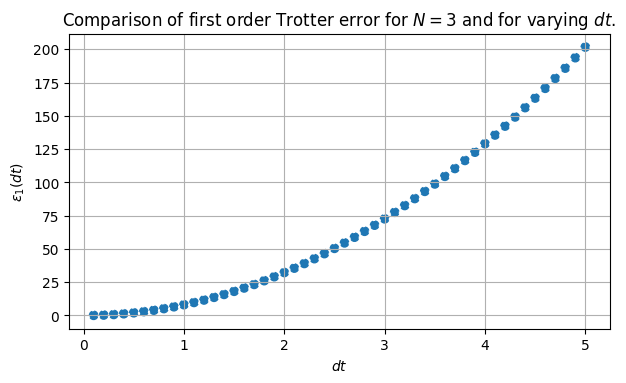

In [15]:
couplings = create_coupling_dict(max_N, "rconstant")

dt_list = np.arange(1, 51) * 0.1
error_dt_N3 = []

for dt in dt_list: error_dt_N3.append(fixed_t_commsum_T1([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3], couplings, dt))

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16 / 2.54, 10 / 2.54)

ax.scatter(dt_list, error_dt_N3, linestyle="--")

ax.set_title (r"Comparison of first order Trotter error for $N=3$ and for varying $dt$.")
ax.set_xlabel(r"$dt$")
ax.set_ylabel(r"$\varepsilon_1(dt)$")

plt.grid()
plt.tight_layout()
plt.show()

### 3.2 $N=3$ tests
I have derived analitically expression $(7)$ for $N=3$. For the sake of testing my numerical routines, in the following code I compute the same expression.

$$
\begin{split}
    & [B_3,A_3]+[C_3,A_3]+[C_3,B_3] = \frac{i}{2}\Bigl\{X_1Y_2Z_3\left(g_{12}g_{13}-3g_{12}g_{23}+g_{13}g_{23}\right)+X_1Z_2Y_3\left(g_{12}g_{13}+g_{12}g_{23}-3g_{13}g_{23}\right)+\\
    & \qquad+Y_1X_2Z_3\left(-3g_{12}g_{13}+g_{12}g_{23}+g_{13}g_{23}\right)+Y_1Z_2X_3\left(-3g_{12}g_{13}+g_{12}g_{23}+g_{13}g_{23}\right)+\\
    & \qquad+Z_1X_2Y_3\left(g_{12}g_{13}+g_{12}g_{23}-3g_{13}g_{23}\right)+Z_1Y_2X_3\left(g_{12}g_{13}-3g_{12}g_{23}+g_{13}g_{23}\right)\Bigr\}
\end{split}
$$

In [16]:
def merge_terms_dicts(dict_list):
    def canonicalize(term):
        factors = term.replace(")(", " ").replace("(", "").replace(")", "").split()
        factors = sorted(factors)
        return "(" + ")(".join(factors) + ")"

    result = {}

    for d in dict_list:
        for key, pairs in d.items():
            if key not in result:
                result[key] = {}

            for coeff, term in pairs:
                norm_term = canonicalize(term)
                if norm_term in result[key]:
                    result[key][norm_term] += coeff
                else:
                    result[key][norm_term] = coeff

    for key in result:
        result[key] = [[coeff, term] for term, coeff in result[key].items() if coeff != 0]

    return result

XY3XZ3 = comm_lincombo(XY3, XZ3)
XY3YZ3 = comm_lincombo(XY3, YZ3)
XZ3YZ3 = comm_lincombo(XZ3, YZ3)

terms_B3A3 = group_by_pauli_string(XY3XZ3, N=3)
terms_C3A3 = group_by_pauli_string(XY3YZ3, N=3)
terms_C3B3 = group_by_pauli_string(XZ3YZ3, N=3)

merged3 = merge_terms_dicts([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3])
merged3

{'YXZ': [[-1.5j, '(g12)(g13)'], [0.5j, '(g12)(g23)'], [0.5j, '(g13)(g23)']],
 'XYZ': [[-1.5j, '(g12)(g23)'], [0.5j, '(g12)(g13)'], [0.5j, '(g13)(g23)']],
 'ZYX': [[0.5j, '(g12)(g13)'], [-1.5j, '(g12)(g23)'], [0.5j, '(g13)(g23)']],
 'YZX': [[0.5j, '(g12)(g23)'], [-1.5j, '(g12)(g13)'], [0.5j, '(g13)(g23)']],
 'XZY': [[-1.5j, '(g13)(g23)'], [0.5j, '(g12)(g13)'], [0.5j, '(g12)(g23)']],
 'ZXY': [[0.5j, '(g12)(g13)'], [-1.5j, '(g13)(g23)'], [0.5j, '(g12)(g23)']]}

The results are indeed equal.

### 3.3 $e_1$ decomposition
Recall expression $(1)$. I assume that the function $e_1$ decomposes as
$$
e_1(N, dt, \{g_{ij}, i,j=1,\dots,N, i<j\}) = n_1(N)\cdot\tau_1(dt)\cdot G_1(\{g_{ij}\})\qquad \text{ILLEGAL (maybe)}
$$
As anticipated in $(1)$, I can make the additional assumption that each function is a power law. 

The goal of this section is to determine the first order Trotter error scaling by studying each component of the error separately.

Consider expression $(4)$ for arbitrary N. I can massage it in a form that justifies my assumption about the structure of the $e_1$ function. 
$$
\begin{split}
& \frac{t^2}{2}\left\{\|[B_N,A_N]\|+\|[C_N,A_N]\|+\|[C_N,B_N]\|\right\} = \frac{t^2}{2}\left\{\left\|[H_{XY}^N,H_{XZ}^N]\right\|+\left\|[H_{XY}^N,H_{YZ}^N]\right\|+\left\|[H_{XZ}^N,H_{YZ}^N]\right\|\right\} \\
& \qquad = \frac{t^2}{8}\Biggl\{\left\|\sum_{\substack{p,q=1\\ p<q}}^N\sum_{\substack{m,n=1\\ m<n}}^N g_{pq}g_{mn}\left([X_pX_q,Z_mZ_n]+[Z_pZ_q,X_mX_n]+[Y_pY_q,Z_mZ_n]\right)\right\|+\left\|\sum_{\substack{p,q=1\\ p<q}}^N\sum_{\substack{m,n=1\\ m<n}}^N g_{pq}g_{mn}\left([X_pX_q,Z_mZ_n]+[Z_pZ_q,X_mX_n]+[Y_pY_q,Z_mZ_n]\right)\right\|+\\
& \qquad + \left\|\sum_{\substack{p,q=1\\ p<q}}^N\sum_{\substack{m,n=1\\ m<n}}^N g_{pq}g_{mn}\left([X_pX_q,Z_mZ_n]+[Z_pZ_q,X_mX_n]+[Y_pY_q,Z_mZ_n]\right)\right\|\Biggr\}\\
\end{split}
$$
Now set $g_{ij} = \frac{\mu}{N}\left(1-\cos(\theta_{ij})\right)$ and call $\Theta\equiv\max_{i,j}\left[1-\cos(\theta_{ij})\right]$, so that
$$
\begin{split}
& \frac{t^2}{2}\left\{\|[B_N,A_N]\|+\|[C_N,A_N]\|+\|[C_N,B_N]\|\right\} \leq \frac{1}{8}dt^2\mu^2\frac{\Theta^2}{N^2}\{\left\|\dots\right\|+\left\|\dots\right\|+\left\|\dots\right\|\}\\ \tag{8}
\end{split}
$$
I ought to provide an upper bound for the scaling of the number of terms in the norms as I vary $N$. (TODO)

### 3.4 Numerical Analysis of Error Scalings
I fit the scaling of the various components involved in the error factorization. 


#### 3.4.1 $dt$ scaling
Analyze time scaling of single step error moving in the space of the other parameters. I fit the error function fixing $N$ and the set of coupling constants $\{g_{ij}\}$. I then vary the values of the latter to explore the scaling behaviour in different scenarios. The fit function is given by:
$$
\begin{split}
& e_1(\tilde{N}, dt, \{\tilde{g}_{ij}\}) = C_3\cdot (dt)^{\mathcal{S}_3^\alpha} \\
& \implies \log(e_1) = C_3 + S_{3}^\alpha\cdot \log(dt) \\
\end{split}
$$
where $C_3$ represents the contribution due to the number of qubits in the system and the coupling values.


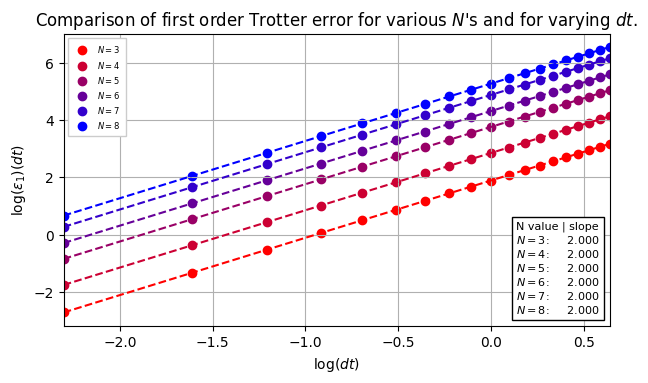

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  
from matplotlib.offsetbox import AnchoredText
from iminuit import Minuit
from iminuit.cost import LeastSquares  

def color_gradient(start, end, n):
    """Generate n hex colors from start to end."""
    start_rgb = np.array(mcolors.to_rgb(start))
    end_rgb = np.array(mcolors.to_rgb(end))
    return [mcolors.to_hex(start_rgb + (end_rgb - start_rgb) * i/(n-1)) for i in range(n)]

def transpose(lsls):
    """
    lsls (list of lists): list of lists to be transposed
    """

    num_cols = len(lsls[0])
    num_rows = len(lsls)

    transposed = []

    for col in range(num_cols):
        new_row = []
        for row in range(num_rows):
            new_row.append(lsls[row][col])
        transposed.append(new_row)

    return transposed

def line(x, C, alpha):
    return C + alpha*x

def compute_error_values_T1(tlist, coupl_dict):
    """
    TODO allow for list fo coupl_dicts to be passed
    """
    err_vls = []    
    for dt in tlist:
        vls = []
        vls.append(fixed_t_commsum_T1([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3], coupl_dict, dt))
        vls.append(fixed_t_commsum_T1([terms_XY4XZ4, terms_XY4YZ4, terms_XZ4YZ4], coupl_dict, dt)) 
        vls.append(fixed_t_commsum_T1([terms_XY5XZ5, terms_XY5YZ5, terms_XZ5YZ5], coupl_dict, dt)) 
        vls.append(fixed_t_commsum_T1([terms_XY6XZ6, terms_XY6YZ6, terms_XZ6YZ6], coupl_dict, dt)) 
        vls.append(fixed_t_commsum_T1([terms_XY7XZ7, terms_XY7YZ7, terms_XZ7YZ7], coupl_dict, dt)) 
        vls.append(fixed_t_commsum_T1([terms_XY8XZ8, terms_XY8YZ8, terms_XZ8YZ8], coupl_dict, dt)) 
        err_vls.append(vls)
        
    return err_vls

values_N = np.arange(3,9)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16 / 2.54, 10 / 2.54)

dt_list = np.arange(1,20) * 0.1
couplings = create_coupling_dict(max_N, "uniform")

colors = color_gradient("#ff0000", "#0000ff", len(values_N))
colors_line = color_gradient("#ff0000dd", "#0000ffc7", len(values_N))

err_vls = compute_error_values_T1(dt_list, couplings)

tr_err_vls = transpose(err_vls)
log_dt_list = np.log(dt_list)
log_tr_err_vls = [np.log(vls) for vls in tr_err_vls]

m_objects = []

for i, log_vls in enumerate(log_tr_err_vls): 
    ls_obj = LeastSquares(log_dt_list, log_vls, 0.001, line)
    m_obj = Minuit(ls_obj, C=1, alpha=1)
    m_obj.migrad()
    m_obj.hesse()
    m_objects.append(m_obj)

for i, log_vls in enumerate(log_tr_err_vls): 
    ax.scatter(log_dt_list, log_vls, color=colors[i], marker='o', label=rf"$N={values_N[i]}$")
    ax.plot(log_dt_list, line(log_dt_list, m_objects[i].values[0], m_objects[i].values[1]), color=colors_line[i], linestyle="--")

ax.set_title (r"Comparison of first order Trotter error for various $N$'s and for varying $dt$.")
ax.set_xlabel(r"$\log(dt)$")
ax.set_ylabel(r"$\log(\varepsilon_1)(dt)$")
ax.set_xlim(np.min(log_dt_list), np.max(log_dt_list))

legend = ax.legend(loc=2, frameon=True, borderaxespad=0.8, fontsize=6)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle("Square")

textstr =  "N value | slope\n"
textstr += "\n".join([fr"$N={{{values_N[i]}}}$:     {m_obj.values[1]:.3f}" for i, m_obj in enumerate(m_objects)])   
anchored_text = AnchoredText(textstr, loc="lower right", prop=dict(size=8), frameon=True)
ax.add_artist(anchored_text)

plt.grid()
plt.tight_layout()
plt.show()

Running this bit of code multiple times shows that varying the number of qubits $N$ and varying the values of the set of coefficients by extracting them randomly in a uniform interval does not affect the dependance of $e_1$ with respect to $dt$.

I verified that the time dependance of the error factorizes and is quadratic: $\tau_1(dt)\sim (dt)^2$.

In [18]:
time_coeffs = {f"N={values_N[i]}": m_obj.values[0] for i, m_obj in enumerate(m_objects)}
time_coeffs

{'N=3': 1.8857145891049012,
 'N=4': 2.846679993436464,
 'N=5': 3.756176482605189,
 'N=6': 4.309419152283625,
 'N=7': 4.873449832807834,
 'N=8': 5.267185358004631}

#### 3.4.2 $dt$ scaling: power law fit

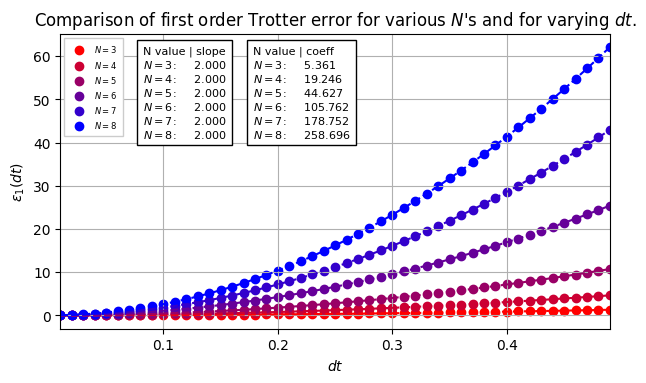

In [19]:
from matplotlib.offsetbox import AnnotationBbox, TextArea

def power_law(x, C, S):
    return C * x**S

values_N = np.arange(3,9)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16 / 2.54, 10 / 2.54)

dt_list = np.arange(1,50) * 0.01
couplings = create_coupling_dict(max_N, "uniform")

colors = color_gradient("#ff0000", "#0000ff", len(values_N))
colors_line = color_gradient("#ff0000dd", "#0000ffc7", len(values_N))

err_vls = compute_error_values_T1(dt_list, couplings)

tr_err_vls = transpose(err_vls)

m_objects = []

for i, vls in enumerate(tr_err_vls): 
    ls_obj = LeastSquares(dt_list, vls, 0.001, power_law)
    m_obj = Minuit(ls_obj, C=1, S=1)
    m_obj.migrad()
    m_obj.hesse()
    m_objects.append(m_obj)

for i, vls in enumerate(tr_err_vls): 
    ax.scatter(dt_list, vls, color=colors[i], marker='o', label=rf"$N={values_N[i]}$")
    ax.plot(dt_list, power_law(dt_list, m_objects[i].values[0], m_objects[i].values[1]), color=colors_line[i], linestyle="--")

ax.set_title (r"Comparison of first order Trotter error for various $N$'s and for varying $dt$.")
ax.set_xlabel(r"$dt$")
ax.set_ylabel(r"$\varepsilon_1(dt)$")
ax.set_xlim(np.min(dt_list), np.max(dt_list))

legend = ax.legend(loc=2, frameon=True, borderaxespad=0.8, fontsize=6)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle("Square")

textstr =  "N value | slope\n"
textstr += "\n".join([fr"$N={{{values_N[i]}}}$:     {m_obj.values[1]:.3f}" for i, m_obj in enumerate(m_objects)])   

ab_slope = AnnotationBbox(TextArea(textstr, textprops=dict(size=8)), (0.15, 0.64), xycoords="axes fraction", frameon=True, box_alignment=(0, 0))
ax.add_artist(ab_slope)

textstr =  "N value | coeff\n"
textstr += "\n".join([fr"$N={{{values_N[i]}}}$:     {m_obj.values[0]:.3f}" for i, m_obj in enumerate(m_objects)])   

ab_slope = AnnotationBbox(TextArea(textstr, textprops=dict(size=8)), (0.35, 0.64), xycoords="axes fraction", frameon=True, box_alignment=(0, 0))
ax.add_artist(ab_slope)

plt.grid()
plt.tight_layout()
plt.show()

#### 3.4.3 $N$ scaling: there are caveats
Fit the dependance of $e_1$ with respect to $N$, fixing the other parameters and then varying them to explore different scenarios and validate the behaviour of this part of the dependence.
$$
\begin{split}
& e_1(N, \tilde{dt}, \{\tilde{g}_{ij}\}) = C_2\cdot (dt)^{\mathcal{S}_2^\alpha} \\
& \implies \log(e_1) = C_2 + S_{2}^\alpha\cdot \log(N) \\
\end{split}
$$
It turns out that this approach is naive since it aims to compare, for the same timestep $dt$, systems with different $N$ with the couplings configured randomly as the numebr of qubits grows. 


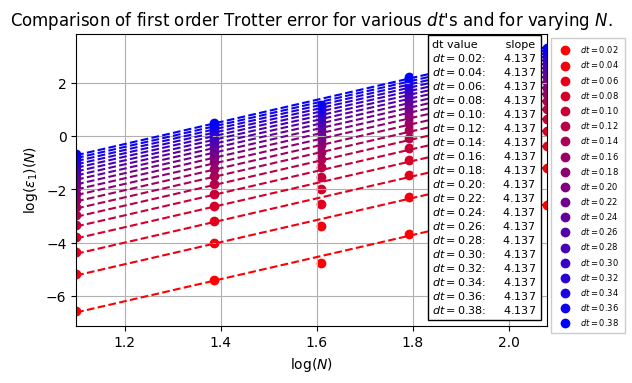

In [42]:
mu = 0.5 * 1e2

values_N = np.arange(3,9)
dt_list = np.arange(1,20) / mu

colors = color_gradient("#ff0000", "#0000ff", len(values_N))
colors_line = color_gradient("#ff0000dd", "#0000ffc7", len(values_N))

couplings = create_coupling_dict(max_N, "uniform")
err_vls = compute_error_values_T1(dt_list, couplings)

log_values_N = np.log(values_N)
log_err_vls = [np.log(vls) for vls in err_vls]

m_objects = []

for i, log_vls in enumerate(log_err_vls): 
    ls_obj = LeastSquares(log_values_N, log_vls, 0.001, line)
    m_obj = Minuit(ls_obj, C=1, alpha=3)
    m_obj.migrad()
    m_obj.hesse()
    m_objects.append(m_obj)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16 / 2.54, 10 / 2.54)

colors = color_gradient("#ff0000", "#0000ff", len(dt_list))
colors_line = color_gradient("#ff0000dd", "#0000ffc7", len(dt_list))

for i, log_vls in enumerate(log_err_vls): 
    ax.scatter(log_values_N, log_vls, color=colors[i], marker='o', label=rf"$dt={dt_list[i]:.2f}$")
    ax.plot(log_values_N, line(log_values_N, m_objects[i].values[0], m_objects[i].values[1]), color=colors_line[i], linestyle="--")

ax.set_title (r"Comparison of first order Trotter error for various $dt$'s and for varying $N$.")
ax.set_xlabel(r"$\log(N)$")
ax.set_ylabel(r"$\log(\varepsilon_1)(N)$")
ax.set_xlim(np.min(log_values_N), np.max(log_values_N))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])

legend = ax.legend(loc=2, frameon=True, borderaxespad=0.8, fontsize=6, bbox_to_anchor=(1,1))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle("Square")


textstr =  "dt value        slope\n"
textstr += "\n".join([fr"$dt={{{dt_list[i]:.2f}}}$:     {m_obj.values[1]:.3f}" for i, m_obj in enumerate(m_objects)])   
anchored_text = AnchoredText(textstr, loc="lower right", prop=dict(size=8), frameon=True)
ax.add_artist(anchored_text)

plt.grid()
plt.tight_layout()
plt.show()

Note that varying the range over which $dt$ is varied influences the value of the fitted slope. In particular:
* if all the couplings are equal, indipendently of the value the fitted value of the slope is given by $S_2^\alpha=4.075$;
* if the values of the coupling are randomly generated, the fitted value of the slope varies. (but actually this is due to randomness of couplings. At same $dt$ value I'm fitting, for varying $N$, system that are dynamically different. From here the varying slope number)

Hence this way of analyzing the problem is not correct, and a refinement of the procedure is necessary.

### 3.5 Peaked Neutrino Beam
I work out the fit function starting from $(1)$, assuming I can only factorize the time dependance. Hence I have:
$$
\begin{split}
& e_1(N, \tilde{dt}, \{g_{ij}\}) = \tau(\tilde{dt})\cdot\Gamma(N, \{g_{ij}\}) \\
& \implies \frac{e_1(N, \tilde{dt}, \{g_{ij}\})}{\tau(\tilde{dt})} = \Gamma(N, \{g_{ij}\})
\end{split}
$$
Again, I have to make assumptions on the structure of $\Gamma(N, \{g_{ij}\})$, and again I go with a power law for the $N$ dependance. Inspired by the bound I obtain above in the "Decomposition of first order Trotter error", I propose the following one parameter fit function:
$$
\mathcal{F}(N, \{g_{ij}\}; \gamma) = \frac{e_1(N, \tilde{dt}, \{g_{ij}\})}{\Theta^2\tau(\tilde{dt})} =  \frac{1}{8}\mu^2N^\gamma \tag{9}
$$
NB I may need to account for the time dependance more carefully

NOTE probably this way I'm again "factorizing" the two dependences, but at least I take into account $\Theta$.

NOTE use $\mathcal{F'}(N, \{g_{ij}\}; \gamma')=\frac{1}{8}\mu^2\Theta^2N^{-2+\gamma'}$ instead? To isolate contribution of $\dots$'s in $(8)$.

NB: $\Theta$ depends on $N$ so I have to divide the error value by it to remove this part of the dependance on the number of qubits. 

**NOTE** (on coupling constants): before $(8)$ I introduced this expression for the coupling constant, inspired by https://arxiv.org/pdf/2207.03189 (equations $(6)$ and $(9)$):
$$
g_{ij} = \frac{\mu}{N}\left(1-\cos(\theta_{ij})\right)
$$
with $\theta_{ij} = \arccos(0.9)\frac{|i-j|}{(N-1)}$ the angle between neutrino $i$ and $j$, and $\mu=\sqrt{2}G_Fn_\nu$, where $n_\nu=N/V$, is an energy scale for the system. This choice is meant to reproduce a narrow cone of forward peaked neutrinos (setup analyzed in the paper).

In [21]:
mu = 0.5 * 1e2 # motivate its value

def theta_nu(N, i, j, vl):
    return np.arccos(vl) * abs(i-j) / (N-1)

def fp_couplings(N, peakness): # fp = forward peaked
    """
    N (int): number of neutrinos
    peakness (float): in [-1,1)
    """
    if peakness < -1 or peakness >= 1: raise Exception(f"Value of peakness argument must be in [-1,1) interval, but {peakness} ins't.")
    coupl_dic = {}
    angle_dic = {}
    for i in range(N):
        for j in range(i+1, N):
            angle_dic[f"g{i+1}{j+1}"] = theta_nu(N, i, j, peakness)
            coupl_dic[f"g{i+1}{j+1}"] = mu * (1-np.cos(theta_nu(N, i, j, peakness))) / N

    return coupl_dic, angle_dic

#### 3.5.1 Visualization of neutrino beam
... fill ...

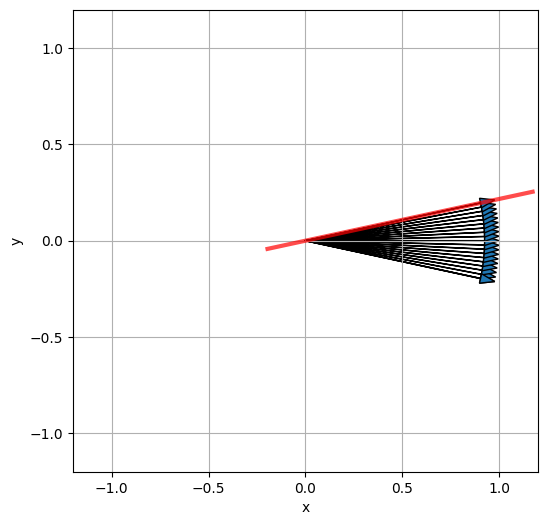

In [22]:
N = 20

peakness = 0.9

_, angles = fp_couplings(N, peakness)

ang_max = max(angles.values())
ang_min = min(angles.values())

shifted_angles = {key: value - (ang_max+ang_min)/2 for key, value in angles.items()}

dx = [np.cos(value) for _, value in shifted_angles.items()]
dy = [np.sin(value) for _, value in shifted_angles.items()]


plt.figure(figsize=(6,6))
for i in range(0, N): plt.arrow(0, 0, dx[i], dy[i], head_width=0.05, length_includes_head=True, label=f"i={i+1}")

xpts = np.array([-0.2*np.cos(np.arccos(peakness)-(ang_max+ang_min)/2), 1.2*np.cos(np.arccos(peakness)-(ang_max+ang_min)/2)])
ypts = np.array([-0.2*np.sin(np.arccos(peakness)-(ang_max+ang_min)/2), 1.2*np.sin(np.arccos(peakness)-(ang_max+ang_min)/2)])

plt.plot(xpts, ypts, 'r-', linewidth=3, alpha=0.7)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

For a fixed value of `peakness`, I'm interested in determining the value of $\Theta$ for varying $N$.

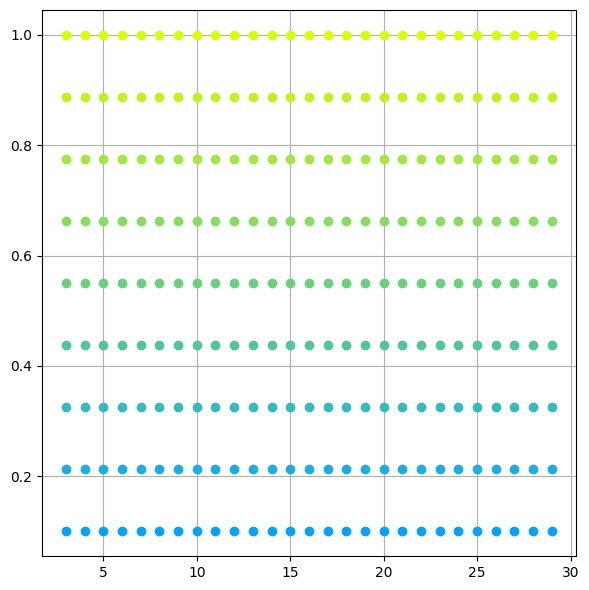

In [23]:
def Theta(angles):
    return max(1 - np.cos(angle) for angle in angles.values())

Nvls = np.arange(3,30)
Pvls = np.linspace(0,0.9,9)

colors = color_gradient("#d9ff00", "#00a2ff", len(Pvls))

plt.figure(figsize=(6,6))

for i, peakness in enumerate(Pvls):
    for j, N in enumerate(Nvls):
        _, angles = fp_couplings(N, peakness)
        plt.plot(N, Theta(angles), marker='o', color=colors[i])

legend = ax.legend(loc=2, frameon=True, borderaxespad=0.8, fontsize=6)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle("Square")

plt.tight_layout()
plt.grid()
plt.show()
    
    

$\Theta$ is only a function of the couplings and in particular indipendent of $N$.

#### 3.5.2 $dt$ scaling


#### 3.5.3 $N$ scaling: first approach (log-log)
Now I simulate and fit using this distribution of couplings. For a fixed $dt$.



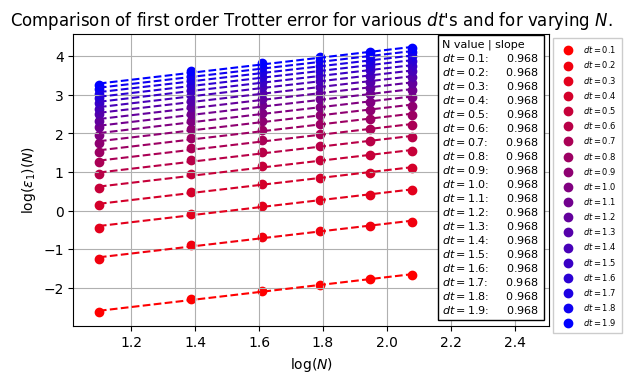

In [24]:
values_N = np.arange(3,9)
dt_list = np.arange(1,20) * 0.1

colors = color_gradient("#ff0000", "#0000ff", len(values_N))
colors_line = color_gradient("#ff0000dd", "#0000ffc7", len(values_N))

err_vls = []
# create coupling dicts
couplings3, _ = fp_couplings(3, 0.9)
couplings4, _ = fp_couplings(4, 0.9)
couplings5, _ = fp_couplings(5, 0.9)
couplings6, _ = fp_couplings(6, 0.9)
couplings7, _ = fp_couplings(7, 0.9)
couplings8, _ = fp_couplings(8, 0.9)


for dt in dt_list:
    vls = []
    vls.append(fixed_t_commsum_T1([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3], couplings3, dt))
    vls.append(fixed_t_commsum_T1([terms_XY4XZ4, terms_XY4YZ4, terms_XZ4YZ4], couplings4, dt)) 
    vls.append(fixed_t_commsum_T1([terms_XY5XZ5, terms_XY5YZ5, terms_XZ5YZ5], couplings5, dt)) 
    vls.append(fixed_t_commsum_T1([terms_XY6XZ6, terms_XY6YZ6, terms_XZ6YZ6], couplings6, dt)) 
    vls.append(fixed_t_commsum_T1([terms_XY7XZ7, terms_XY7YZ7, terms_XZ7YZ7], couplings7, dt)) 
    vls.append(fixed_t_commsum_T1([terms_XY8XZ8, terms_XY8YZ8, terms_XZ8YZ8], couplings8, dt)) 
    err_vls.append(vls)

log_values_N = np.log(values_N)
log_err_vls = [np.log(vls) for vls in err_vls]

m_objects = []

for i, log_vls in enumerate(log_err_vls): 
    ls_obj = LeastSquares(log_values_N, log_vls, 0.001, line)
    m_obj = Minuit(ls_obj, C=1, alpha=3)
    m_obj.migrad()
    m_obj.hesse()
    m_objects.append(m_obj)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16 / 2.54, 10 / 2.54)

colors = color_gradient("#ff0000", "#0000ff", len(dt_list))
colors_line = color_gradient("#ff0000dd", "#0000ffc7", len(dt_list))

for i, log_vls in enumerate(log_err_vls): 
    ax.scatter(log_values_N, log_vls, color=colors[i], marker='o', label=rf"$dt={dt_list[i]:.1f}$")
    ax.plot(log_values_N, line(log_values_N, m_objects[i].values[0], m_objects[i].values[1]), color=colors_line[i], linestyle="--")

min_logN = np.min(log_values_N)
max_logN = np.max(log_values_N)


ax.set_title (r"Comparison of first order Trotter error for various $dt$'s and for varying $N$.")
ax.set_xlabel(r"$\log(N)$")
ax.set_ylabel(r"$\log(\varepsilon_1)(N)$")
ax.set_xlim(min_logN - 0.05*(min_logN + max_logN)/2, max_logN + 0.27*(min_logN + max_logN)/2)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])

legend = ax.legend(loc=2, frameon=True, borderaxespad=0.8, fontsize=6, bbox_to_anchor=(1,1))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle("Square")


textstr =  "N value | slope\n"
textstr += "\n".join([fr"$dt={{{dt_list[i]:.1f}}}$:     {m_obj.values[1]:.3f}" for i, m_obj in enumerate(m_objects)])   
anchored_text = AnchoredText(textstr, loc="lower right", prop=dict(size=8), frameon=True)
ax.add_artist(anchored_text)

plt.grid()
plt.tight_layout()
plt.show()

For `peakness=0.9` (the value in the paper) I get a slope value of $0.968$.

I can also vary the variable `peakness` (in the `fp_couplings` function above), that is directly related to how collimated the neutrino beam is, and track the value of the slope meanwhile.

In [25]:
mu = 0.5 * 1e2

peakness_vls = np.arange(-100,100) * 1e-2
slopes_logfit = []
dt_list = np.arange(1,10) / mu

xs_logfit = []
ys_logfit = []
zs_logfit = []
Cs = []

for peak in peakness_vls:
    for dt in dt_list:
        err_vls = []

        couplings3, angles3 = fp_couplings(3, peak)
        couplings4, angles4 = fp_couplings(4, peak)
        couplings5, angles5 = fp_couplings(5, peak)
        couplings6, angles6 = fp_couplings(6, peak)
        couplings7, angles7 = fp_couplings(7, peak)
        couplings8, angles8 = fp_couplings(8, peak) 

        err_vls.append(fixed_t_commsum_T1([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3], couplings3, dt)/dt**2/Theta(angles3))
        err_vls.append(fixed_t_commsum_T1([terms_XY4XZ4, terms_XY4YZ4, terms_XZ4YZ4], couplings4, dt)/dt**2/Theta(angles4))
        err_vls.append(fixed_t_commsum_T1([terms_XY5XZ5, terms_XY5YZ5, terms_XZ5YZ5], couplings5, dt)/dt**2/Theta(angles5))
        err_vls.append(fixed_t_commsum_T1([terms_XY6XZ6, terms_XY6YZ6, terms_XZ6YZ6], couplings6, dt)/dt**2/Theta(angles6))
        err_vls.append(fixed_t_commsum_T1([terms_XY7XZ7, terms_XY7YZ7, terms_XZ7YZ7], couplings7, dt)/dt**2/Theta(angles7))
        err_vls.append(fixed_t_commsum_T1([terms_XY8XZ8, terms_XY8YZ8, terms_XZ8YZ8], couplings8, dt)/dt**2/Theta(angles8))

        log_values_N = np.log(values_N)
        log_err_vls = [np.log(x) for x in err_vls]

        ls_obj = LeastSquares(log_values_N, log_err_vls, 0.001, line)
        m_obj = Minuit(ls_obj, C=1, alpha=2)
        m_obj.migrad()
        m_obj.hesse()

        slopes_logfit.append(m_obj.values[1])
        xs_logfit.append(peak)
        ys_logfit.append(dt)
        zs_logfit.append(m_obj.values[1])
        Cs.append(m_obj.values[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xs_logfit, ys_logfit, zs_logfit, c=zs_logfit, cmap="viridis", s=40)

ax.set_xlabel("peakness")
ax.set_ylabel("dt")
ax.set_zlabel("slope")
fig.colorbar(scatter, ax=ax, label="slope")

plt.show()

KeyboardInterrupt: 

In [ ]:
print(min(Cs))
print(max(Cs))
print(min(slopes_logfit))
print(max(slopes_logfit))

0.9330824566209047
6.8579215228597405
0.9664131782663005
1.1129541508611336


#### 3.5.4 $N$ scaling: second approach (alt)
I fit the function $\mathcal{F}(N, \{g_{ij}\}; \gamma) = \frac{1}{8}\mu^2KN^\gamma$. I want to see the effect of this refinement on the fitted value of the slope.


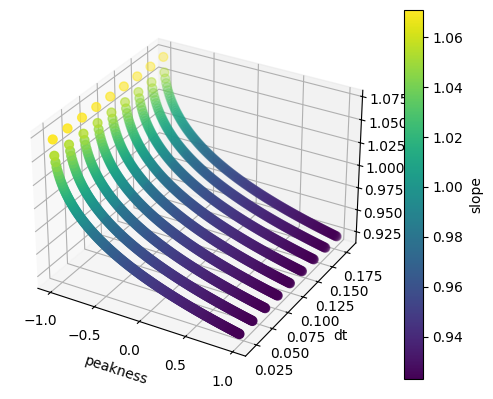

In [ ]:
mu = 0.5 * 1e2

def model_timenorm(x, gamma, K):
    return mu**2 * K * x**gamma / 8

peakness_vls = np.arange(-100,100) * 1e-2
slopes_altfit = []
dt_list = np.arange(1,10) / mu

xs_altfit = []
ys_altfit = []
zs_altfit = []
Ks = []

for peak in peakness_vls:
    for dt in dt_list:
        err_vls_dt = []

        couplings3, angles3 = fp_couplings(3, peak)
        couplings4, angles4 = fp_couplings(4, peak)
        couplings5, angles5 = fp_couplings(5, peak)
        couplings6, angles6 = fp_couplings(6, peak)
        couplings7, angles7 = fp_couplings(7, peak)
        couplings8, angles8 = fp_couplings(8, peak)

        err_vls_dt.append(fixed_t_commsum_T1([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3], couplings3, dt)/dt**2/Theta(angles3)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY4XZ4, terms_XY4YZ4, terms_XZ4YZ4], couplings4, dt)/dt**2/Theta(angles4)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY5XZ5, terms_XY5YZ5, terms_XZ5YZ5], couplings5, dt)/dt**2/Theta(angles5)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY6XZ6, terms_XY6YZ6, terms_XZ6YZ6], couplings6, dt)/dt**2/Theta(angles6)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY7XZ7, terms_XY7YZ7, terms_XZ7YZ7], couplings7, dt)/dt**2/Theta(angles7)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY8XZ8, terms_XY8YZ8, terms_XZ8YZ8], couplings8, dt)/dt**2/Theta(angles8)**2)

        ls_obj = LeastSquares(values_N, err_vls_dt, 0.001, model_timenorm)
        m_obj = Minuit(ls_obj, gamma=1, K=1)
        m_obj.migrad()
        m_obj.hesse()

        slopes_altfit.append(m_obj.values[0])
        xs_altfit.append(peak)
        ys_altfit.append(dt)
        zs_altfit.append(m_obj.values[0])   
        Ks.append(m_obj.values[1])      


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xs_altfit, ys_altfit, zs_altfit, c=zs_altfit, cmap="viridis", s=40)

ax.set_xlabel("peakness")
ax.set_ylabel("dt")
ax.set_zlabel("slope")
fig.colorbar(scatter, ax=ax, label="slope")

plt.show()

Results are consistent with the previous approach, but not exactly equal.

In [ ]:
print(max(Ks))
print(min(Ks))
print(min(slopes_altfit))
print(max(slopes_altfit))

1.6390895851893152
0.8781159341196072
0.922786105931033
1.0709527434122743


This suggests that I'm still not fully accounting for some dependence, otherwise they would all be equal I think (TODO).


I can also choose to fit $\mathcal{F'}(N, \{g_{ij}\}; \gamma')=\frac{1}{8}\mu^2\Theta^2N^{-2+\gamma'}$:

c:\Users\edori\AppData\Local\Programs\Python\Python313\Lib\site-packages\iminuit\cost.py:172: RuntimeWarning: overflow encountered in multiply
  return z * z
C:\Users\edori\AppData\Local\Temp\ipykernel_21824\496543802.py:4: RuntimeWarning: overflow encountered in power
  return mu**2 * Kp * x**(gammap-2) / 8


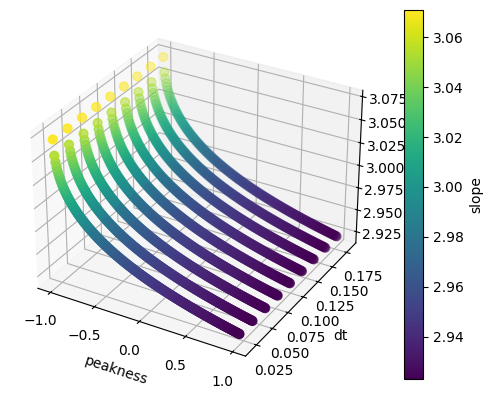

In [ ]:
mu = 0.5 * 1e2

def model_timenorm_m2(x, gammap, Kp):
    return mu**2 * Kp * x**(gammap-2) / 8

peakness_vls = np.arange(-100,100) * 1e-2
slopes_m2_altfit = []
dt_list = np.arange(1,10) / mu

xs_altfit_m2 = []
ys_altfit_m2 = []
zs_altfit_m2 = []
Kps = []

for peak in peakness_vls:
    for dt in dt_list:
        err_vls_dt = []

        couplings3, angles3 = fp_couplings(3, peak)
        couplings4, angles4 = fp_couplings(4, peak)
        couplings5, angles5 = fp_couplings(5, peak)
        couplings6, angles6 = fp_couplings(6, peak)
        couplings7, angles7 = fp_couplings(7, peak)
        couplings8, angles8 = fp_couplings(8, peak)

        err_vls_dt.append(fixed_t_commsum_T1([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3], couplings3, dt)/dt**2/Theta(angles3)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY4XZ4, terms_XY4YZ4, terms_XZ4YZ4], couplings4, dt)/dt**2/Theta(angles4)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY5XZ5, terms_XY5YZ5, terms_XZ5YZ5], couplings5, dt)/dt**2/Theta(angles5)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY6XZ6, terms_XY6YZ6, terms_XZ6YZ6], couplings6, dt)/dt**2/Theta(angles6)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY7XZ7, terms_XY7YZ7, terms_XZ7YZ7], couplings7, dt)/dt**2/Theta(angles7)**2)
        err_vls_dt.append(fixed_t_commsum_T1([terms_XY8XZ8, terms_XY8YZ8, terms_XZ8YZ8], couplings8, dt)/dt**2/Theta(angles8)**2)

        ls_obj = LeastSquares(values_N, err_vls_dt, 0.001, model_timenorm_m2)
        m_obj = Minuit(ls_obj, gammap=1, Kp=1)
        m_obj.migrad()
        m_obj.hesse()

        slopes_m2_altfit.append(m_obj.values[0])
        xs_altfit_m2.append(peak)
        ys_altfit_m2.append(dt)
        zs_altfit_m2.append(m_obj.values[0])   
        Kps.append(m_obj.values[1])      


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xs_altfit_m2, ys_altfit_m2, zs_altfit_m2, c=zs_altfit_m2, cmap="viridis", s=40)

ax.set_xlabel("peakness")
ax.set_ylabel("dt")
ax.set_zlabel("slope")
fig.colorbar(scatter, ax=ax, label="slope")

plt.show()

#### 3.5.5 $N$ scaling: third approach (count terms to estimate $\gamma'$) (TODO)


#### 3.5.6 Compare $N$ scalings results
I compare for now the two approaches I introduced.

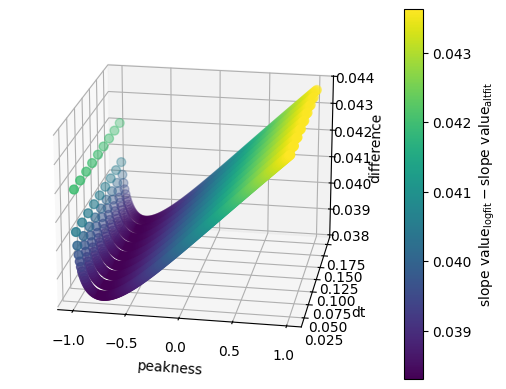

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.array(xs_logfit)
ys = np.array(ys_logfit)
zs_logfit = np.array(zs_logfit)
zs_altfit = np.array(zs_altfit)
scatter = ax.scatter(xs, ys, zs_logfit-zs_altfit, c=zs_logfit-zs_altfit, cmap="viridis", s=40)

ax.set_xlabel("peakness")
ax.set_ylabel("dt")
ax.set_zlabel("difference")
fig.colorbar(scatter, ax=ax, label=r"$\text{slope value}_\text{logfit}-\text{slope value}_\text{altfit}$")
ax.view_init(elev=20, azim=-80)  # adjust these numbers as you like

plt.show()

I can also plot the two behaviours for a fixed $dt$ to appreciate their difference.

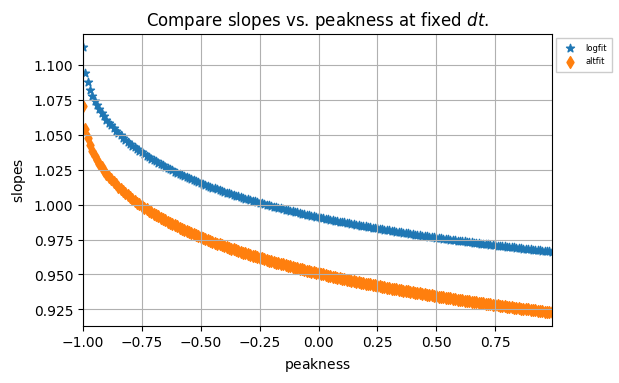

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16 / 2.54, 10 / 2.54)

ax.scatter(peakness_vls, slopes_logfit[0::len(dt_list)], marker="*", label="logfit")
ax.scatter(peakness_vls, slopes_altfit[0::len(dt_list)], marker="d", label="altfit")

ax.set_title (r"Compare slopes vs. peakness at fixed $dt$.")
ax.set_xlabel(r"$\text{peakness}$")
ax.set_ylabel(r"$\text{slopes}$")
ax.set_xlim(min(peakness_vls), max(peakness_vls))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])

legend = ax.legend(loc=2, frameon=True, borderaxespad=0.8, fontsize=6, bbox_to_anchor=(1,1))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle("Square")

plt.grid()
plt.tight_layout()
plt.show()

### 3.6 Yet another attempt
Recall expression $(8)$ in Section $3.3$ for the first order Trotter error bound:
$$
\varepsilon_1(dt)\leq\frac{dt^2}{2}\left\{\|[B_N,A_N]\|+\|[C_N,A_N]\|+\|[C_N,B_N]\|\right\} \leq \frac{1}{2}dt^2\mu^2\frac{\Theta^2}{N^2}\{\left\|\dots\right\|+\left\|\dots\right\|+\left\|\dots\right\|\}
$$
where
$$
C_1(dt, ...) = \frac{dt^2}{2}\left\{\|[B_N,A_N]\|+\|[C_N,A_N]\|+\|[C_N,B_N]\|\right\},\quad C_2(dt, ...) = \frac{1}{2}dt^2\mu^2\frac{\Theta^2}{N^2}\{\left\|\dots\right\|+\left\|\dots\right\|+\left\|\dots\right\|\}
$$
NOTE: I'm not accounting for the $1/2$ factors appearing in each term of $H_{XY}^N, H_{XZ}^N, H_{YZ}^N$ in the expression for $C_2$.

My aim is to provide a bound for $\varepsilon_1(dt)$. The first inequality is introduced in Section 1; I have developed tools to compute the expression on the right exactly. The second inequality follows from a simple argument (see $3.3$). In the previous Sections I attempted to use a functional expression inspired by the looser bound to fit values computed with the commutator combination. I don't believe this approach to be quite right since it does not produce, for a given parameter, a result that is indipendent of the others. 

I choose to work with the peaked neutrino beam

Hence I attack the problem with the following workflow:
- choose the parameter whose behaviour I want to analyze, and let the others vary over some ranges of values;
- compute $C_1$;
- compute $C_2$;
- check $C_1\leq C_2$ holds;
- fit $C_2$ data points with the fit function $\mathcal{F}(...) = \frac{1}{2}dt^2\mu^2\Theta^2N^{-2+c}$;

I need to implement a function that works out the expression for $C_2$. The main task is the computation of the expressions in the spectral I accomplish by calculating the matrix that results from summing up all the contribution in a single term and computing its norm. The function `operator_sum_norm` is dedicated to this task.

Consider the general expression for the Trotter error: recalling the definition of $g_{ij}$ for the peaked neutrino beam setup
$$
\begin{split}
& \epsilon_1(dt)\leq\frac{dt^2}{2}\left\{\|[B_N,A_N]\|+\|[C_N,A_N]\|+\|[C_N,B_N]\|\right\} \\
& \qquad \leq \frac{dt^2}{2}\Theta^2\frac{\mu^2}{N^2}\left\{\left\|\sum_{k\in d_1^N}P_k\right\|+\left\|\sum_{k\in d_2^N}P_k\right\|+\left\|\sum_{k\in d_3^N}P_k\right\|\right\} \tag{10}\\
\end{split}
$$
The sets $d_1^N, \dots$ are the same as $\mathcal{D}_1^N, \dots$ introduced around $(7)$ but represent all separate contributions coming from the commutator as they appear without regrouping.

I can choose to use the expression for the individual commutators after having them regrouped using `group_by_pauli_string`. This is the same as summing the separate contributions without grouping them:
$$
\left\|\sum_{k\in\mathcal{d}}\mathcal{g}_kP_k\right\| = \left\|\sum_{k\in\mathcal{D}}\mathcal{G}_kP_k\right\| 
$$
where for $P_i,P_j\in D$, $P_i\neq P_j$ for $i\neq j$ (this is not true for elements of $d$) and $g_k$ represent the coupling associated to contribution $k$ (e.g. $g_{12}g_{23}$).

I introduce various functions; before combining them to produce the result I'm seeking, I explain and test each of them.

`kroenecker_string_norm`: this is a support function that takes as argument a Pauli string as a string (e.g. "XYIZ") and returns the corresponding matrix expression, computed using basic `qutip` functionalities. 

In [ ]:
import qutip as qt

pauli_matrices = {
        'I': qt.qeye(2),
        'X': qt.sigmax(),
        'Y': qt.sigmay(),
        'Z': qt.sigmaz(),
}

def kroenecker_string_norm(pstr):
    """
    Computes matrix corresponding to a Pauli string using the definition of Kroenecker product.
    A Qobj is returned.
    """
    if '0' in pstr:
        dim = 2 ** len(pstr)
        return qt.Qobj(np.zeros((dim, dim), dtype=complex))

    # Validate characters
    for p in pstr:
        if p not in pauli_matrices:
            raise ValueError(f"Invalid Pauli character: '{p}'")

    # Build tensor product
    return qt.tensor([pauli_matrices[p] for p in pstr])

I test this function for a few straightforward cases:

**Example 1**: $N=2$
$$
P = X_1X_2 = \sigma_x\otimes\sigma_x =  \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\otimes\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}=\begin{bmatrix} 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ \end{bmatrix}
$$

**Example 2**: $N=2$
$$
P = Y_2 = \mathbb{I}\otimes\sigma_y =  \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\otimes\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}=\begin{bmatrix} 0 & -i & 0 & 0 \\ i & 0 & 0 & 0 \\ 0 & 0 & 0 & -i \\ 0 & 0 & i & 0 \\ \end{bmatrix}
$$

**Example 3**: $N=3$
$$
P = \sigma_x\otimes\sigma_z\otimes\sigma_y =  \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\otimes\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\otimes\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}=\begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}\otimes\begin{bmatrix} 0 & -i & 0 & 0 \\ i & 0 & 0 & 0 \\ 0 & 0 & 0 & i \\ 0 & 0 & -i & 0 \\ \end{bmatrix} = \begin{bmatrix} \dots \end{bmatrix}
$$

Now I try to reproduce the analysis performed in the previous section, that is, fit the scaling with respect to $N$ of the error bound estimate I just introduced, and visualize the scaling coefficient as I vary the `peakness` parameter of the neutrino beam (and the time-step $dt$) 

peak: -1.0 dt: 0.02
5.076802494818164
peak: -1.0 dt: 0.04
5.076802494818164
peak: -1.0 dt: 0.06
5.076802494818164
peak: -1.0 dt: 0.08
5.076802494818164
peak: -1.0 dt: 0.1
5.076802494818164
peak: -1.0 dt: 0.12
5.076802494818164
peak: -1.0 dt: 0.14
5.076802494818164
peak: -1.0 dt: 0.16
5.076802494818164
peak: -1.0 dt: 0.18
5.076802494818164
peak: -0.99 dt: 0.02
5.077136591018469
peak: -0.99 dt: 0.04
5.077136591018469
peak: -0.99 dt: 0.06
5.077136591018469
peak: -0.99 dt: 0.08
5.077136591018469
peak: -0.99 dt: 0.1
5.077136591018469
peak: -0.99 dt: 0.12
5.077136591018469
peak: -0.99 dt: 0.14
5.077136591018469
peak: -0.99 dt: 0.16
5.077136591018469
peak: -0.99 dt: 0.18
5.077136591018469
peak: -0.98 dt: 0.02
5.076271523096399
peak: -0.98 dt: 0.04
5.076271523096399
peak: -0.98 dt: 0.06
5.076271523096399
peak: -0.98 dt: 0.08
5.076271523096399
peak: -0.98 dt: 0.1
5.076271523096399
peak: -0.98 dt: 0.12
5.076271523096399
peak: -0.98 dt: 0.14
5.076271523096399
peak: -0.98 dt: 0.16
5.07627152309639

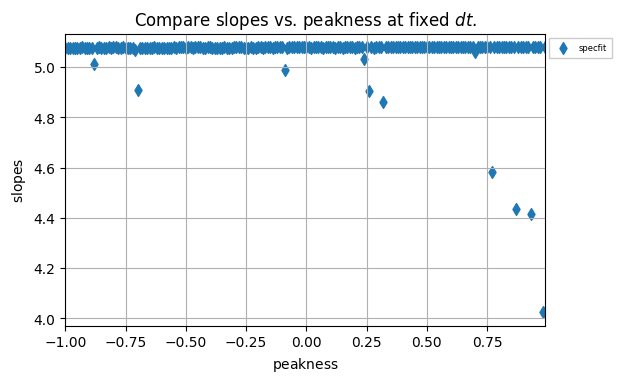

In [ ]:

def spectral_norm(matrix):
        return np.sqrt(np.max((matrix.dag()*matrix).eigenstates()[0]))

def operator_sum_norm(terms):
    """
    terms (list of dicts): [{"XYZ": [[-0.5j, "(g12)(g23)"], ...], ...}, {"XYZ": [[0.5j, "(g12)(g13)"], ...], ...}]
    operator_sum_norm takes as argument a list of dicts, each represententing the rearranged contributions to a single term in the Trotter error.
    It computes the operator norm discarding the coupling constant contribution (see expression (10) for reference) 

    return (float): value of sum of the spectral norms of the individual contributions
    """
    
    sum_norms = 0 

    for term_dict in terms:
        matrix_sum = 0
        for pauli, cont_list in term_dict.items():
            coeff = 0+0j
            for contribution in cont_list: coeff += contribution[0]    
            matrix_sum += kroenecker_string_norm(pauli) * coeff
        sum_norms += spectral_norm(matrix_sum)

    return sum_norms

def model_specsum(x, c, J):
    if np.any(~np.isfinite(x**(-2+c))):
        print(f"Non-finite values detected! x**(-2+c) for x = {x} and c = {c}.")
    if np.any(~np.isfinite(mu**c)):
        print(f"Non-finite values detected! mu**c for mu = {mu} and c = {c}.")
    if np.any(~np.isfinite(x**2)):
        print(f"Non-finite values detected! x**2 for x = {x}.")
    return J * mu**2 * x**(-2+c) / 2

mu = 0.5 * 1e2

values_N = np.arange(3,9)
peakness_vls = np.arange(-100,100) * 1e-2
# dt_list = np.arange(1,10)*1e-2
dt_list = np.arange(1,10) / mu
slopes_specfit = []

xs_specfit = []
ys_specfit = []
zs_specfit = []

for peak in peakness_vls:
    for dt in dt_list:
        print("peak:", peak, "dt:", dt)
        err_vls = []

        couplings3, angles3 = fp_couplings(3, peak)
        couplings4, angles4 = fp_couplings(4, peak)
        couplings5, angles5 = fp_couplings(5, peak)
        couplings6, angles6 = fp_couplings(6, peak)
        couplings7, angles7 = fp_couplings(7, peak)
        couplings8, angles8 = fp_couplings(8, peak)

        err_vls.append(operator_sum_norm([terms_XY3XZ3, terms_XY3YZ3, terms_XZ3YZ3])/mu**2/Theta(angles3)**2)
        err_vls.append(operator_sum_norm([terms_XY4XZ4, terms_XY4YZ4, terms_XZ4YZ4])/mu**2/Theta(angles4)**2)
        err_vls.append(operator_sum_norm([terms_XY5XZ5, terms_XY5YZ5, terms_XZ5YZ5])/mu**2/Theta(angles5)**2)
        err_vls.append(operator_sum_norm([terms_XY6XZ6, terms_XY6YZ6, terms_XZ6YZ6])/mu**2/Theta(angles6)**2)
        err_vls.append(operator_sum_norm([terms_XY7XZ7, terms_XY7YZ7, terms_XZ7YZ7])/mu**2/Theta(angles7)**2)
        err_vls.append(operator_sum_norm([terms_XY8XZ8, terms_XY8YZ8, terms_XZ8YZ8])/mu**2/Theta(angles8)**2)

        ls_obj = LeastSquares(values_N, err_vls, 0.001, model_specsum)
        m_obj = Minuit(ls_obj, c=2, J=1)
        m_obj.limits["c"] = (0, 10)
        m_obj.migrad()
        m_obj.hesse()

        slopes_specfit.append(m_obj.values[0])
        xs_specfit.append(peak)
        ys_specfit.append(dt)
        zs_specfit.append(m_obj.values[0])   
        print(m_obj.values[0])

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16 / 2.54, 10 / 2.54)

ax.scatter(peakness_vls, slopes_specfit[0::len(dt_list)], marker="d", label="specfit")

ax.set_title (r"Compare slopes vs. peakness at fixed $dt$.")
ax.set_xlabel(r"$\text{peakness}$")
ax.set_ylabel(r"$\text{slopes}$")
ax.set_xlim(min(peakness_vls), max(peakness_vls))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])

legend = ax.legend(loc=2, frameon=True, borderaxespad=0.8, fontsize=6, bbox_to_anchor=(1,1))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1.0)
legend.get_frame().set_boxstyle("Square")

plt.grid()
plt.tight_layout()
plt.show()

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#scatter = ax.scatter(xs_specfit, ys_specfit, zs_specfit, c=zs_specfit, cmap="viridis", s=40)
#
#ax.set_xlabel("peakness")
#ax.set_ylabel("dt")
#ax.set_zlabel("slope")
#fig.colorbar(scatter, ax=ax, label="slope")
#
#plt.show()

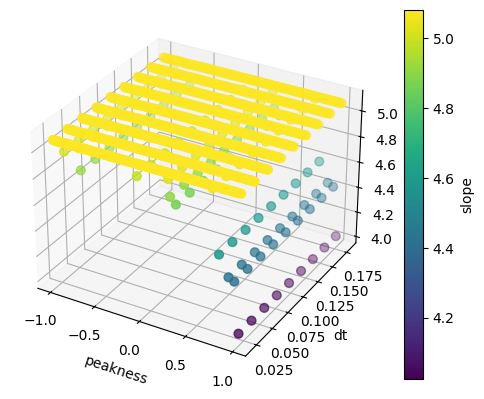

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xs_specfit, ys_specfit, zs_specfit, c=zs_specfit, cmap="viridis", s=40)

ax.set_xlabel("peakness")
ax.set_ylabel("dt")
ax.set_zlabel("slope")
fig.colorbar(scatter, ax=ax, label="slope")

plt.show()

The results I get make me affirm that this way to approach the bounding of the Trotter error provides looser results compared with the previous approaches. I don't understand why. 

### 3.6 Sanity check
The behaviour of the system's error as the number of qubits varies is dependant on the choice of the couplings. I expect it to be the worse possible when all couplings are equal i.e. all the neutrinos are aligned (CHECK). I test this claim. 

Recall the definition of $g_{ij}$, 
$$
g_{ij} = \frac{\mu}{N}\left(1-\cos(\theta_{ij})\right)
$$
I demand that $g_{ij} = g_{i'j'}$, $\forall i,j,i',j' = 1,\dots,N,$, with $i<j$, $i'<j'$, so that $\left(1-\cos(\theta_{ij})\right)=\left(1-\cos(\theta_{i'j'})\right)$, hence $\theta_{ij}$

### 3.7 Results
In this Section I recap the results for the first order single-step Trotter error obtained troughout this notebook.

In order to perform an complete analysis of the Trotter error I had to fix a specific setup for the system in study, and I choose the peaked neutrino beam for having means of comparison for my results; the relevant result are found in Section $3.5$.

I have carried out the task of providing an upper bound estimate for the first order Trotter single-step error scaling as a function of the number of qubits in the system $N$, the length of the time step $dt$ and the coupling coefficient of the system $\{g_{ij}\}_{i<j}$, $i,j = 1,\dots,N$. The latter dependance is mapped in the parameter `peakness`, which corresponds to the cosine of the angle formed between the outermost neutrinos in the peak.

The strictes upper bound I can provide for the error scaling is $e(N,dt,\{g_{ij}\}) = \mathcal{O}\left(\mu^2 dt^2N^\gamma\right)$, with $\gamma\in(0.92,1.12)$.